# Cookie Consent Management Solution Test
#### This notebook demonstrates the complete flow of checking cookie consent management on websites.

## Import required components

In [1]:
from url_processor import URLProcessor
from provider_registry import ProviderRegistry
from browser_manager import BrowserManager
from data_collection import DataCollectionService
import networkx_visualisation
import json
from IPython.display import display, HTML
from dataclasses import asdict
from urllib.parse import urlparse

/Users/mustafacressive.com/Cressive_DX/Tech/Cod/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Initialize components

In [2]:
url_processor = URLProcessor()
provider_registry = ProviderRegistry()
browser_manager = BrowserManager(provider_registry)
data_collector = DataCollectionService(browser_manager)
print("All components initialized")

All components initialized


## Get URLs from user

In [3]:
"""
print("Choose URL input method:")
print("1. Enter comma-separated URLs")
print("2. Use default Abbott URLs")
choice = input("Enter choice (1 or 2): ")

if choice == "1":
   urls_input = input("Enter URLs (comma-separated): ")
   test_urls = [url.strip() for url in urls_input.split(",")]
else:
   test_urls = [
       "it.pediasure.abbott",
       "it.ensure.abbott", 
       "es.ensure.abbott",
       "es.pediasure.abbott"
   ]

# Process URLs to ensure proper format
formatted_urls = []
for url in test_urls:
   if not url.startswith(('http://', 'https://')):
       url = 'https://' + url
   formatted_urls.append(url)

print(f"\nProcessing {len(formatted_urls)} URLs:")
for url in formatted_urls:
   print(f"- {url}")
"""

'\nprint("Choose URL input method:")\nprint("1. Enter comma-separated URLs")\nprint("2. Use default Abbott URLs")\nchoice = input("Enter choice (1 or 2): ")\n\nif choice == "1":\n   urls_input = input("Enter URLs (comma-separated): ")\n   test_urls = [url.strip() for url in urls_input.split(",")]\nelse:\n   test_urls = [\n       "it.pediasure.abbott",\n       "it.ensure.abbott", \n       "es.ensure.abbott",\n       "es.pediasure.abbott"\n   ]\n\n# Process URLs to ensure proper format\nformatted_urls = []\nfor url in test_urls:\n   if not url.startswith((\'http://\', \'https://\')):\n       url = \'https://\' + url\n   formatted_urls.append(url)\n\nprint(f"\nProcessing {len(formatted_urls)} URLs:")\nfor url in formatted_urls:\n   print(f"- {url}")\n'

## Ensure URL format is correct

In [4]:
test_urls = ['wirelesslogic.com']
formatted_urls = []
for url in test_urls:
   if not url.startswith(('http://', 'https://')):
       url = 'https://' + url
   formatted_urls.append(url)

print(f"\nProcessing {len(formatted_urls)} URLs:")
for url in formatted_urls:
   print(f"- {url}")


Processing 1 URLs:
- https://wirelesslogic.com


## Process URLs

In [5]:
print("\nStarting URL processing...")
url_results = url_processor.process_urls(formatted_urls)
print(f"URL processing complete. {len(url_results)} results obtained")


Starting URL processing...
URL processing complete. 1 results obtained


## Collect consent data for each URL

In [6]:
all_results = []
for i, url_result in enumerate(url_results, 1):
    print("Processing URL")
    if url_result.is_valid:
        print("URL is valid, checking for cookie consent...")
        result = data_collector.create_result(url_result)
        all_results.append(result)
        print("Cookie consent check complete")
    else:
        print(f"Skipping invalid URL. Error: {url_result.error_message}")
    
print(f"Processed {len(all_results)} valid URLs")

Processing URL
URL is valid, checking for cookie consent...
Initial cookies count: 38
Final cookies count: 38
No new cookies detected, associating existing cookies with relevant requests...
Initial cookies count: 50
Final cookies count: 50
No new cookies detected, associating existing cookies with relevant requests...
Initial cookies count: 45
Final cookies count: 45
No new cookies detected, associating existing cookies with relevant requests...
Cookie consent check complete
Processed 1 valid URLs


## Display Results

In [7]:
# Display results
print("\nGenerating results...")
for i, result in enumerate(all_results, 1):
    print(f"\n=== Result {i}/{len(all_results)} ===")
    print(f"URL: {result.url_info['requested_url']}")
    
    #print("\nFull Result:")
    #print(json.dumps(asdict(result), indent=2))
    
    print("\nSummary:")
    summary = data_collector.generate_cod_results(result, include_network_chains=True)
    #print(json.dumps(summary, indent=2))

    preconsent_summary = {
    "url_info": summary["url_info"],
    "ccm_banner": summary["ccm_banner"],
    "preConsent": summary["preConsent"]
}

    # Print the filtered dictionary
    print(json.dumps(preconsent_summary, indent=2))
    
    if result.errors:
        print("\nErrors encountered:")
        for error in result.errors:
            print(f"- {error}")


Generating results...

=== Result 1/1 ===
URL: https://wirelesslogic.com

Summary:
{
  "url_info": {
    "requested_url": "https://wirelesslogic.com",
    "final_url": "https://wirelesslogic.com",
    "status_code": 200,
    "domain": "wirelesslogic.com"
  },
  "ccm_banner": {
    "banner_found": true,
    "provider_name": "Usercentrics/Cookiebot"
  },
  "preConsent": {
    "pageNotInteractable": {
      "value": false,
      "interpretation": "Users shouldn't be allowed to interact with page at pre-consent stage",
      "meaning": "Users can interact with page before consent",
      "outlook": "Negative"
    },
    "pageScrollable": {
      "value": true,
      "interpretation": "Page scrolling improves user experience while maintaining compliance",
      "meaning": "Users can scroll the page, providing better UX",
      "outlook": "Positive"
    },
    "firstPartyCookies": {
      "value": true,
      "interpretation": "First party cookies are often essential for functionality. Indi

## Visualise

### Visualise all Phases (d3 chart)

In [8]:
import d3_visualisation_enhanced
def save_network_visualization(result, phase="Pre-consent"):
    """Helper function to save a network visualization to an HTML file"""
    data, provider_name = d3_visualisation_enhanced.prepare_data_for_d3_network(result, phase)
    filename = f"network_viz_{data['name']}_{phase.replace('; ', '_').replace(' ', '_').lower()}.html"
    d3_visualisation_enhanced.save_visualization_html(result, filename, phase)
    print(f"Visualization saved to {filename} - open this file in your browser")
    return filename

In [9]:
save_network_visualization(all_results[0], "Pre-consent")
save_network_visualization(all_results[0], "Post-consent; Cookies Accepted")
save_network_visualization(all_results[0], "Post-consent; Cookies Rejected")

Visualization saved to network_viz_wirelesslogic.com_pre-consent.html
Visualization saved to network_viz_wirelesslogic.com_pre-consent.html - open this file in your browser
Visualization saved to network_viz_wirelesslogic.com_post-consent_cookies_accepted.html
Visualization saved to network_viz_wirelesslogic.com_post-consent_cookies_accepted.html - open this file in your browser
Visualization saved to network_viz_wirelesslogic.com_post-consent_cookies_rejected.html
Visualization saved to network_viz_wirelesslogic.com_post-consent_cookies_rejected.html - open this file in your browser


'network_viz_wirelesslogic.com_post-consent_cookies_rejected.html'

### Visualise Pre-consent Phase


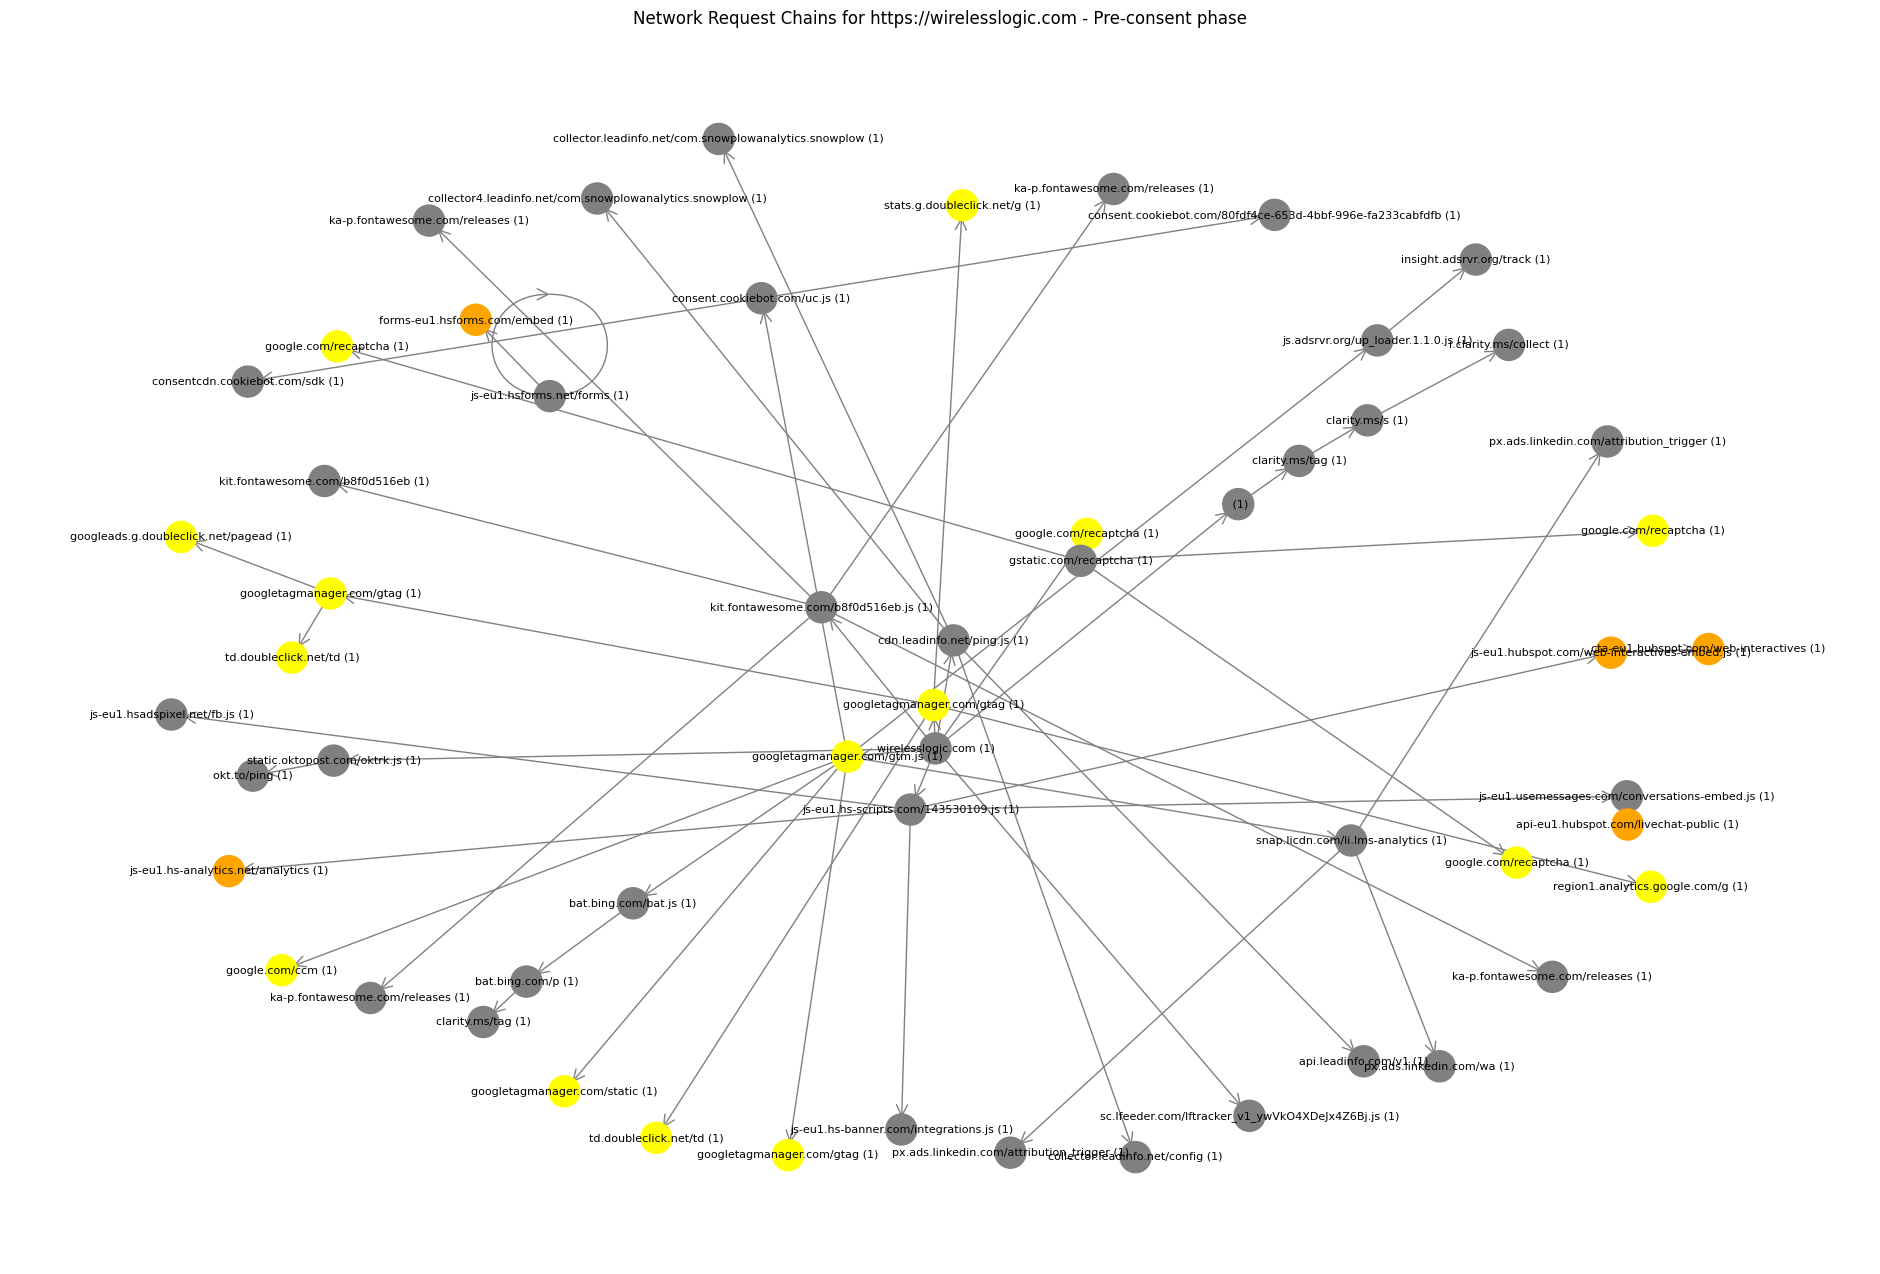

In [10]:
networkx_visualisation.draw_network_graph(all_results[0], False, False, True, "Pre-consent")

### Visualise Post-consent On Accept Phase

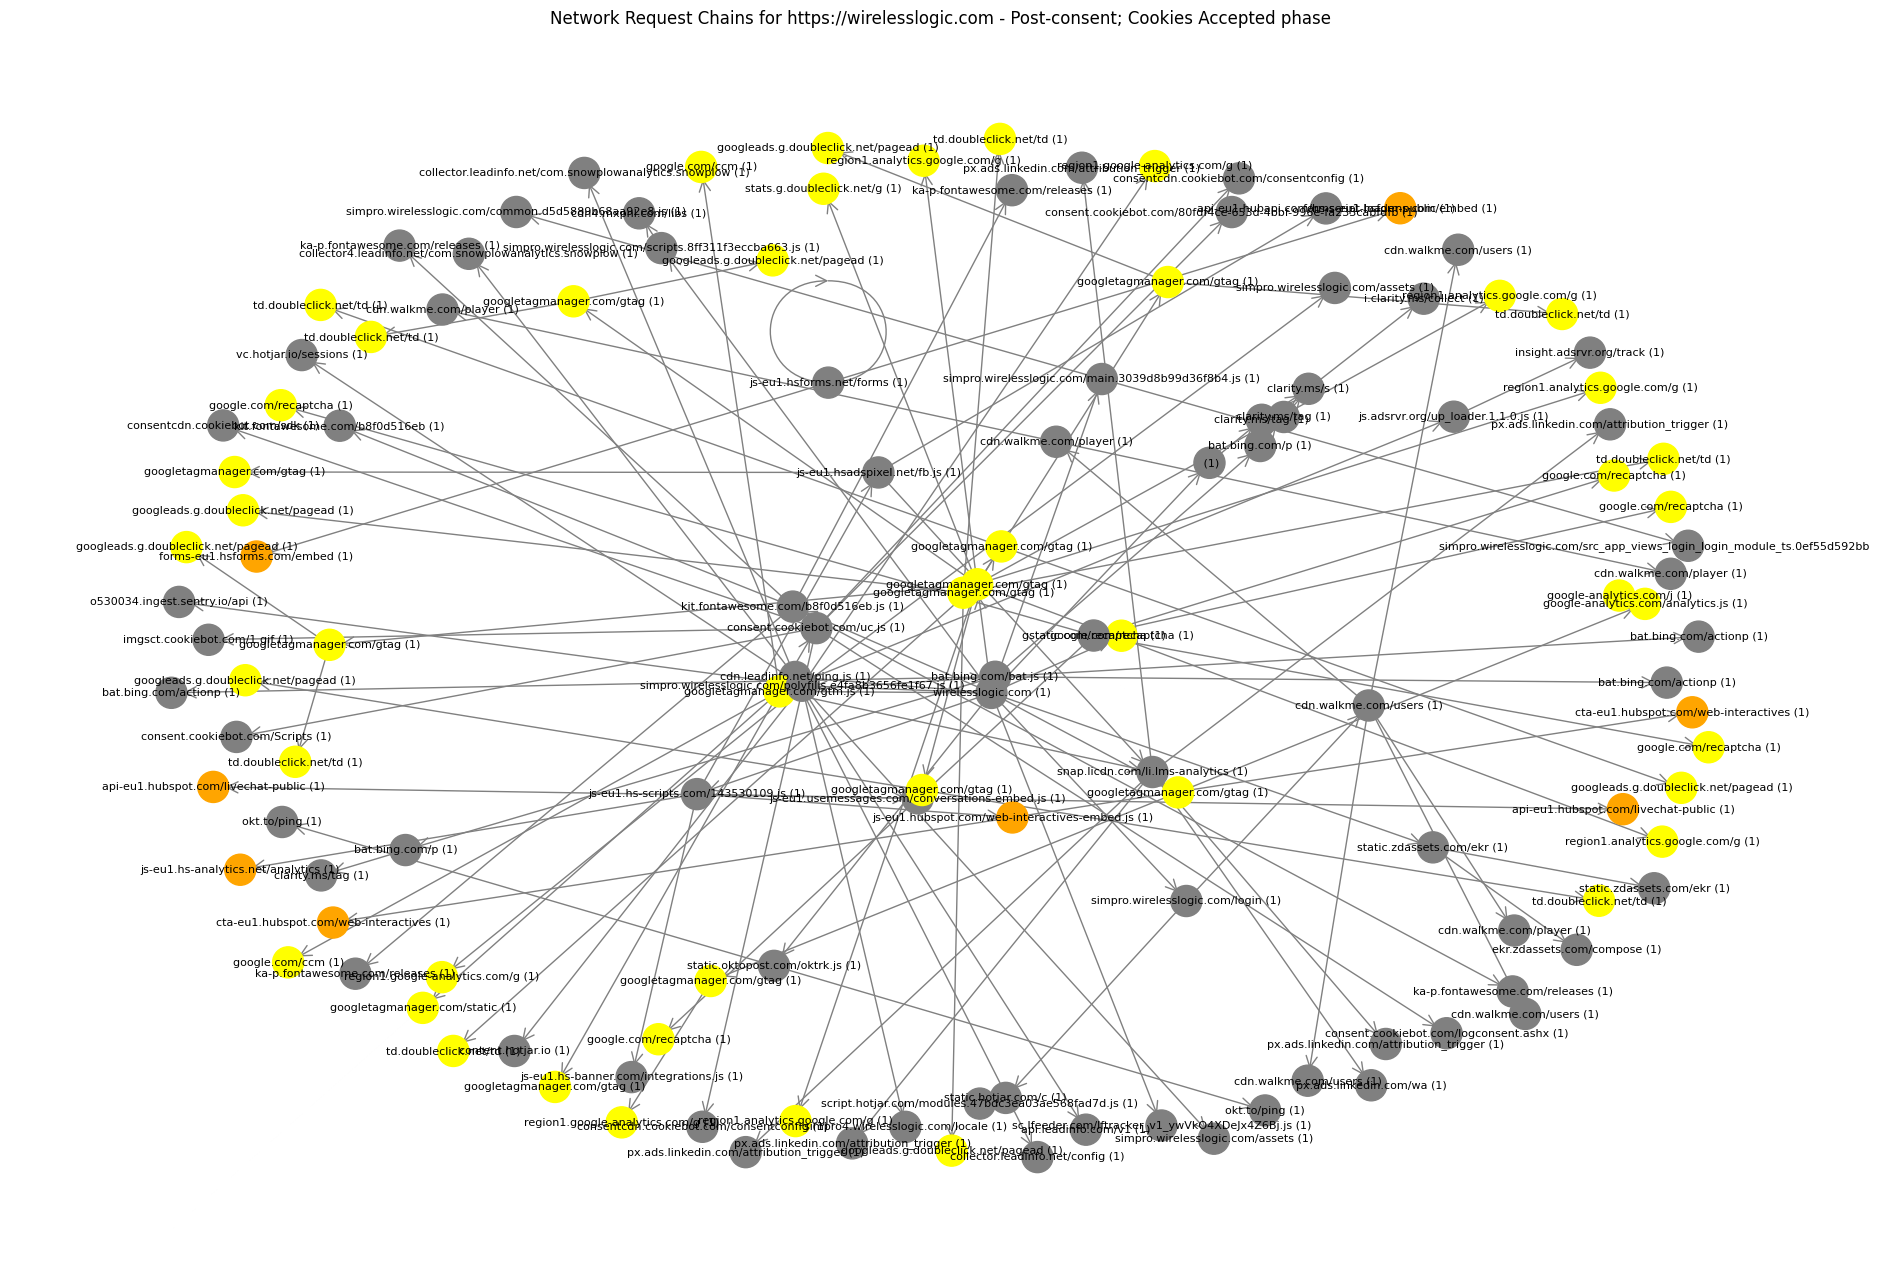

In [11]:
networkx_visualisation.draw_network_graph(all_results[0], False, False, True, "Post-consent; Cookies Accepted")

### Visualise Post-consent On Reject Phase

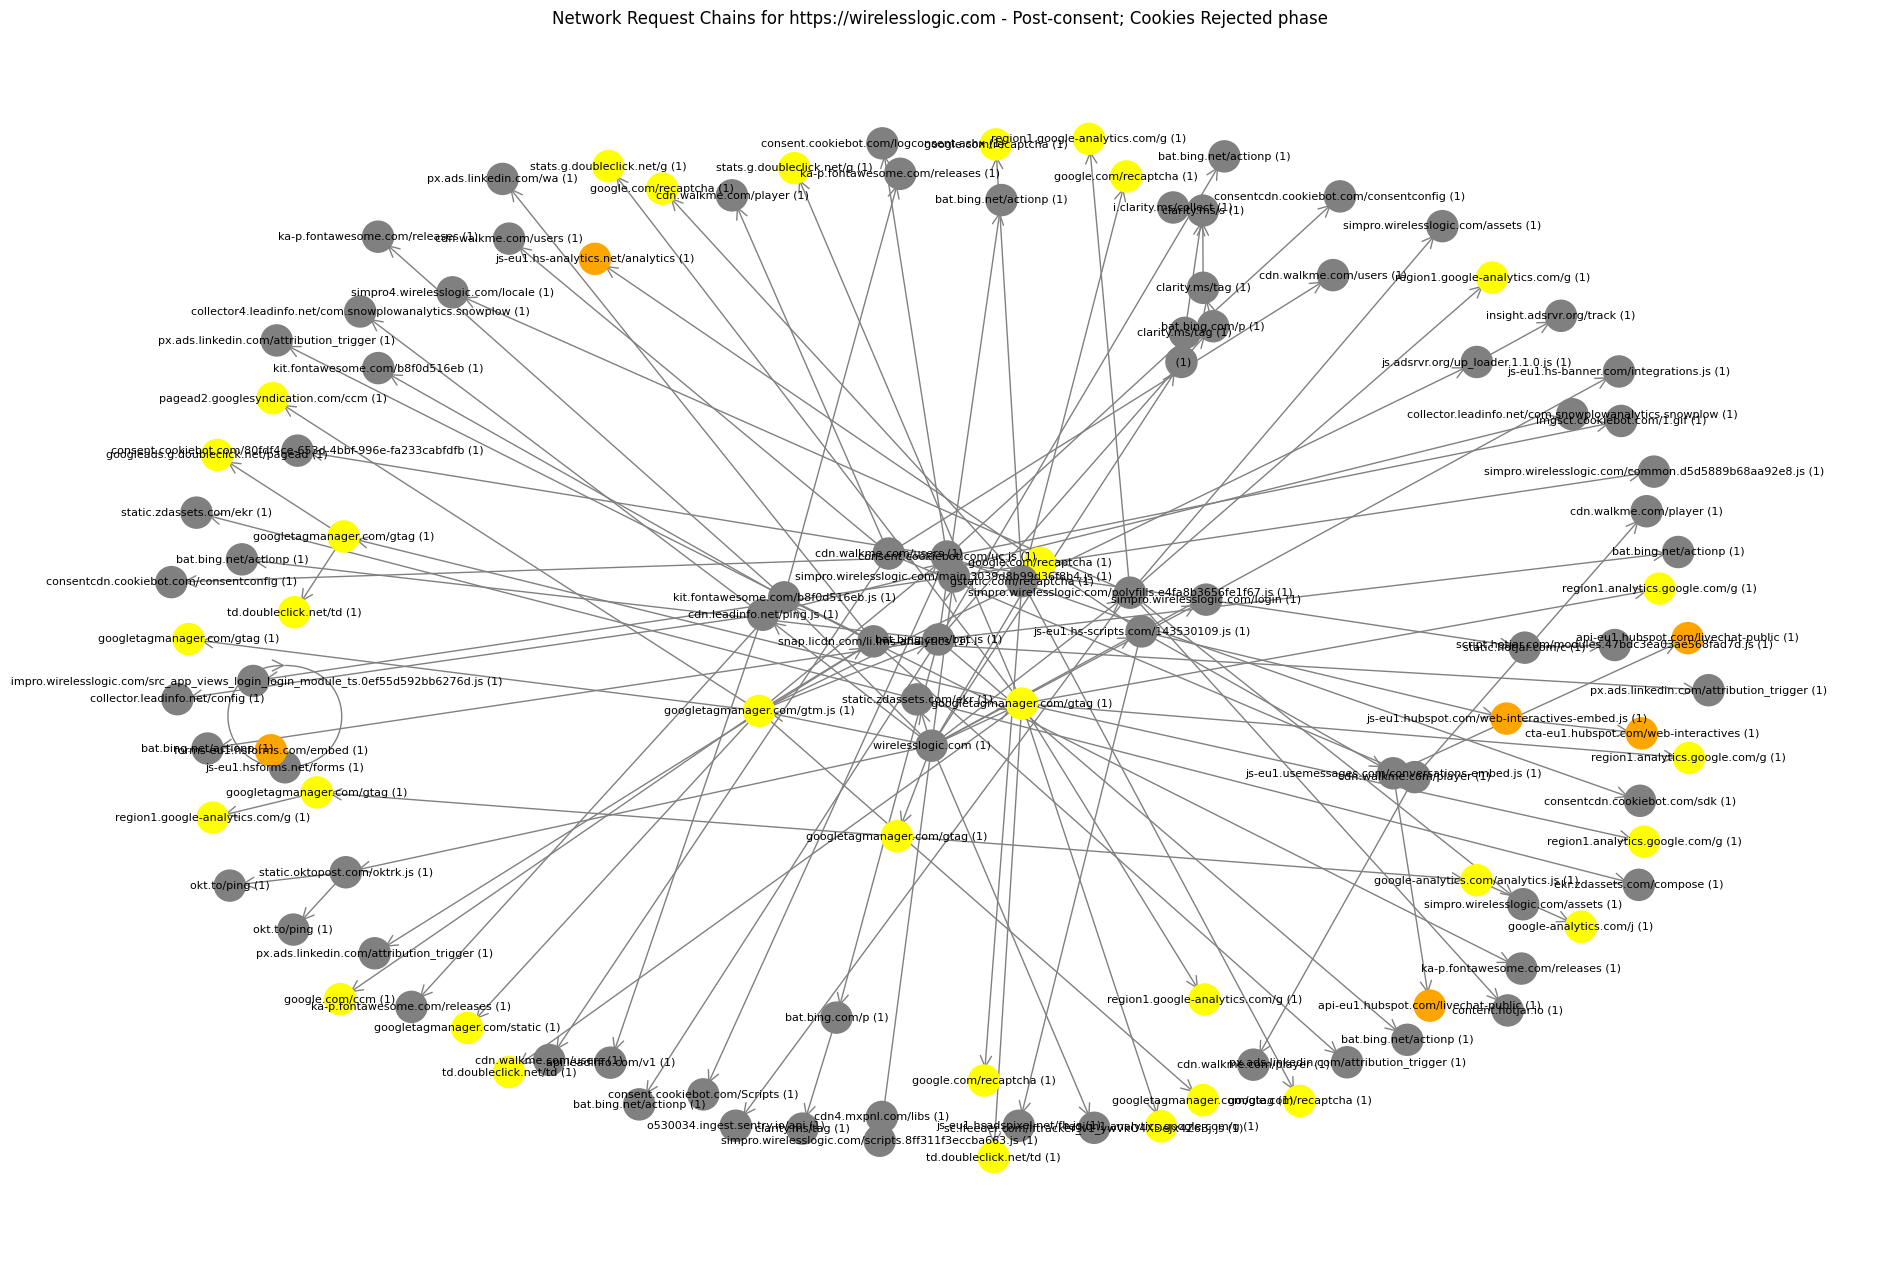

In [12]:
networkx_visualisation.draw_network_graph(all_results[0], False, False, True, "Post-consent; Cookies Rejected")

## Cleanup

In [13]:
print("\nCleaning up resources...")
browser_manager.cleanup()
print("Cleanup complete")


Cleaning up resources...
Cleanup complete
